In [51]:
import cv2 as cv
import numpy as np

- weight file: it's the trained model, the core of the algorithm to detect the objects
- cfg file: it's the configuration file, where there are all the settings of the algorithm
- name files: contains the name of the objects that the algorithm can detect


In [59]:
IMAGE = '../testing_objects/bike-car.jpg'
IMAGE1 = '../testing_objects/traffic.jpg'
IMAGE2 = '../testing_objects/animals.jpg'
IMAGE3 = '../testing_objects/store.jpg'
CONFIG = '../darknet/cfg/yolov3.cfg'
CLASSES = '../darknet/data/coco.names'
WEIGHT = '../darknet/weights/yolov3.weights'

In [53]:
import os
print(os.path.exists(CLASSES))
print(os.path.exists(CONFIG))
print(os.path.exists(IMAGE))
print(os.path.exists(WEIGHT))


True
True
True
True


In [54]:
def process_image(img):
    height, width, channels = img.shape

    # Detecting objects
    # we can't use the full image on the network => use blob to extract feature from the image and to resize them
    blob = cv.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    # for each detection, get the confidence, id class and bounding box params
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            # if the threshold confidence is greater 0.5, we consider the object is correctly detected         
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # apply non-max suppression to outputs many boxes, most of which are irrelevant/redundant
    indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv.FONT_HERSHEY_SIMPLEX
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv.putText(img, label, (x - 10, y - 10), font, 1, color, 2)


In [60]:
# Load Yolo
net = cv.dnn.readNet(WEIGHT, CONFIG)
classes = []
with open(CLASSES, "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image
img = cv.imread(IMAGE)
img = cv.resize(img, None, fx=0.4, fy=0.4)
process_image(img)

img1 = cv.imread(IMAGE1)
img1 = cv.resize(img1, None, fx=0.4, fy=0.4)
process_image(img1)

img2 = cv.imread(IMAGE2)
img2 = cv.resize(img2, None, fx=0.4, fy=0.4)
process_image(img2)

img3 = cv.imread(IMAGE3)
img3 = cv.resize(img3, None, fx=0.4, fy=0.4)
process_image(img3)
# cv.imshow("Image", img)
# cv.waitKey(0)
# cv.destroyAllWindows()

[[ 4]
 [ 6]
 [13]
 [11]
 [ 5]
 [ 2]
 [ 1]
 [12]
 [ 7]
 [17]
 [ 8]
 [18]
 [10]
 [14]
 [19]
 [ 9]
 [ 3]
 [15]
 [16]]
[[2]
 [6]
 [3]
 [4]
 [1]
 [5]
 [0]]
[[ 1]
 [ 7]
 [ 6]
 [ 0]
 [ 9]
 [ 5]
 [ 8]
 [ 3]
 [ 4]
 [10]]
()


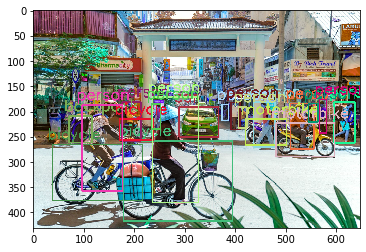

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
plt.imshow(img)


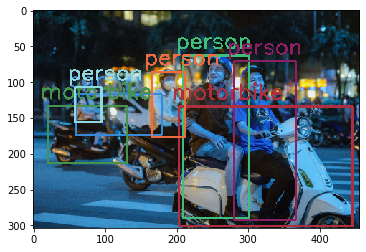

In [62]:
plt.imshow(img1)

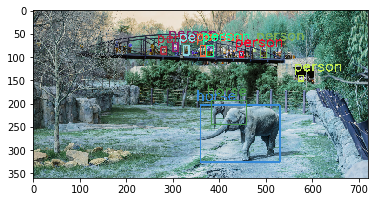

In [63]:
plt.imshow(img2)

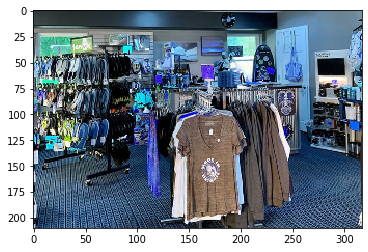

In [64]:
plt.imshow(img3)